In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,517754.0,258876.500000,149462.849974,0.0,129438.25,258876.50,388314.75,517753.0
num_lanes,517754.0,2.491511,1.120434,1.0,1.00,2.00,3.00,4.0
curvature,517754.0,0.488719,0.272563,0.0,0.26,0.51,0.71,1.0
speed_limit,517754.0,46.112575,15.788521,25.0,35.00,45.00,60.00,70.0
num_reported_accidents,517754.0,1.187970,0.895961,0.0,1.00,1.00,2.00,7.0
accident_risk,517754.0,0.352377,0.166417,0.0,0.23,0.34,0.46,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [6]:
df['road_type'].value_counts()
df['lighting'].value_counts()

lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64

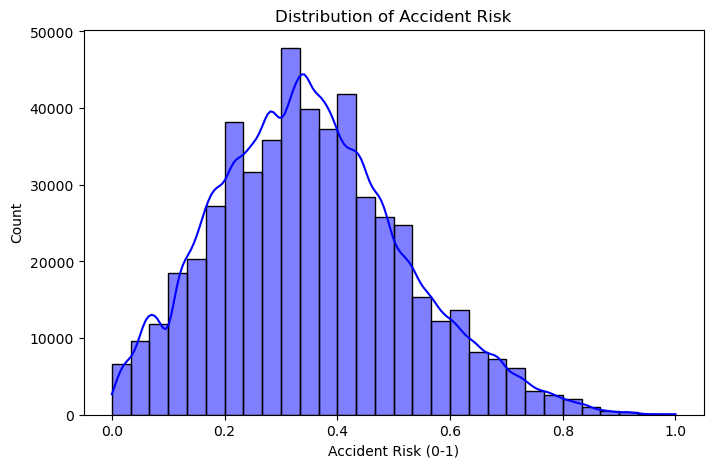

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['accident_risk'], kde=True, bins=30, color="blue")
plt.title("Distribution of Accident Risk")
plt.xlabel("Accident Risk (0-1)")
plt.ylabel("Count")
plt.show()

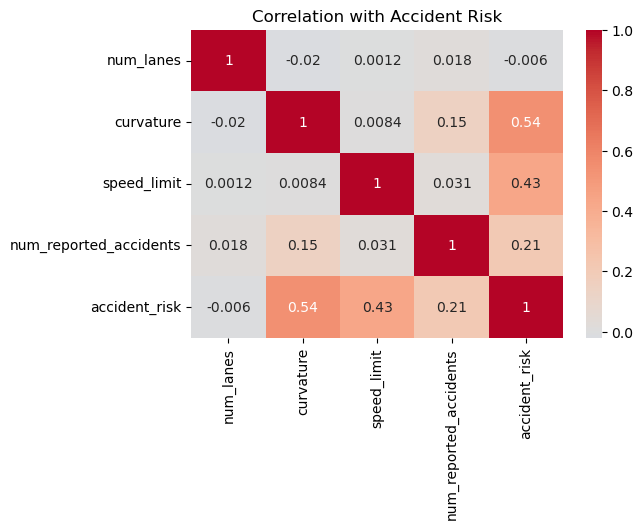

In [8]:
num_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']
corr = df[num_features + ['accident_risk']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation with Accident Risk")
plt.show()

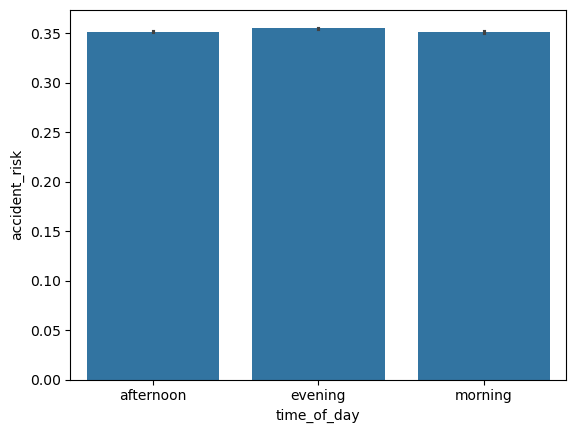

In [9]:
sns.barplot(x='time_of_day', y='accident_risk', data=df)
plt.show()

C:\Users\CoreTech\AppData\Local\Temp\ipykernel_2128\1133105099.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lighting', y='accident_risk', data=df, palette='rainbow')


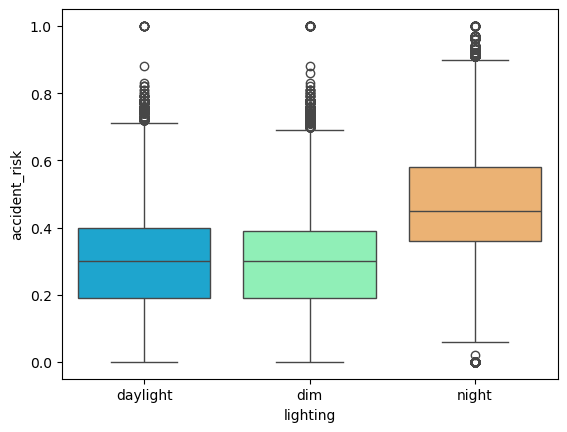

In [10]:
sns.boxplot(x='lighting', y='accident_risk', data=df, palette='rainbow')
plt.show()

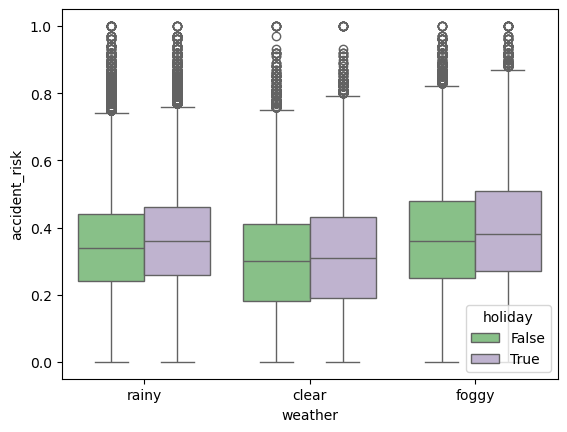

In [11]:
sns.boxplot(x='weather', y='accident_risk', data=df, palette='Accent', hue='holiday')
plt.show()

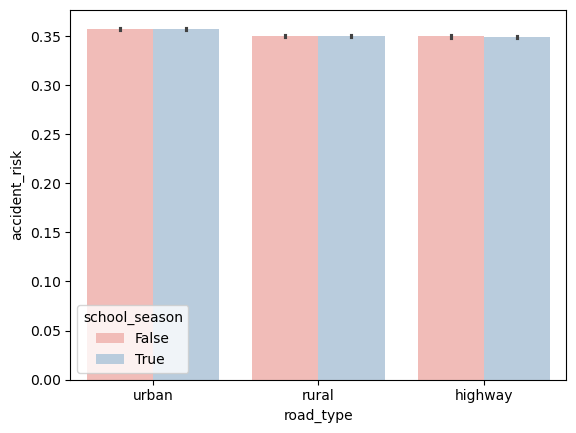

In [12]:
sns.barplot(x='road_type', y='accident_risk', data=df, palette='Pastel1', hue='school_season')
plt.show()

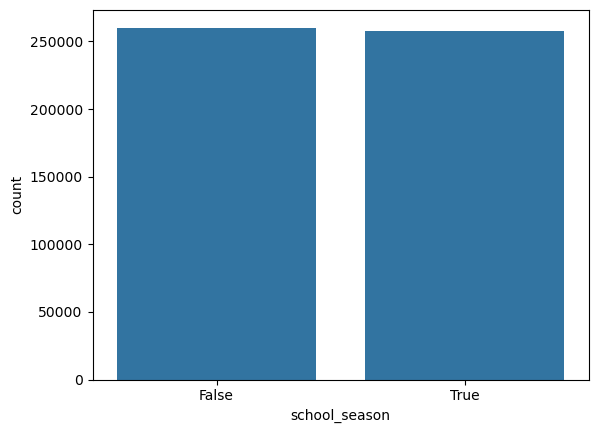

In [13]:
sns.countplot(x='school_season', data=df)
plt.show()

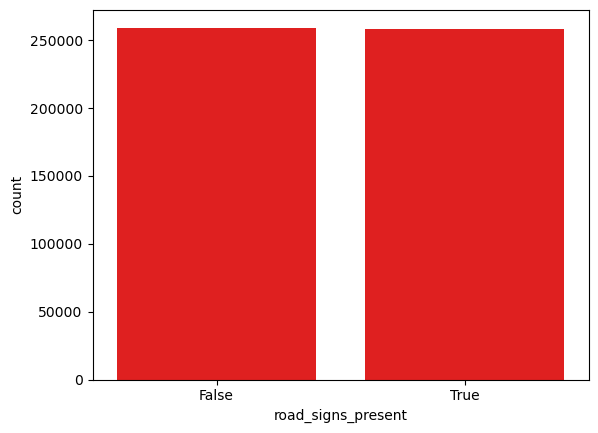

In [15]:
sns.countplot(x='road_signs_present', data=df, color='red')
plt.show()

In [16]:
road_type_dummies = pd.get_dummies(df['road_type'], drop_first=True)
lighting_dummies = pd.get_dummies(df['lighting'], drop_first=True)
weather_dummies = pd.get_dummies(df['weather'], drop_first=True)
time_of_day_dummies = pd.get_dummies(df['time_of_day'], drop_first=True)

In [18]:
df = pd.concat([df, road_type_dummies, lighting_dummies, weather_dummies, time_of_day_dummies], axis=1)

In [19]:
df.drop(['id', 'road_type', 'lighting', 'weather', 'time_of_day'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   num_lanes               517754 non-null  int64  
 1   curvature               517754 non-null  float64
 2   speed_limit             517754 non-null  int64  
 3   road_signs_present      517754 non-null  bool   
 4   public_road             517754 non-null  bool   
 5   holiday                 517754 non-null  bool   
 6   school_season           517754 non-null  bool   
 7   num_reported_accidents  517754 non-null  int64  
 8   accident_risk           517754 non-null  float64
 9   rural                   517754 non-null  bool   
 10  urban                   517754 non-null  bool   
 11  dim                     517754 non-null  bool   
 12  night                   517754 non-null  bool   
 13  foggy                   517754 non-null  bool   
 14  rainy               

In [23]:
df = df.astype({col: int for col in df.select_dtypes('bool').columns})

In [24]:
df.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,rural,urban,dim,night,foggy,rainy,evening,morning
0,2,0.06,35,0,1,0,1,1,0.13,0,1,0,0,0,1,0,0
1,4,0.99,35,1,0,1,1,0,0.35,0,1,0,0,0,0,1,0
2,4,0.63,70,0,1,1,0,2,0.30,1,0,1,0,0,0,0,1
3,4,0.07,35,1,1,0,0,1,0.21,0,0,1,0,0,1,0,1
4,1,0.58,60,0,0,1,0,1,0.56,1,0,0,0,1,0,1,0


In [25]:
X = df.drop('accident_risk', axis=1)
y = df['accident_risk']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression 

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
print(lm.intercept_)

-0.17726280871145988


In [32]:
predictions = lm.predict(X_test)

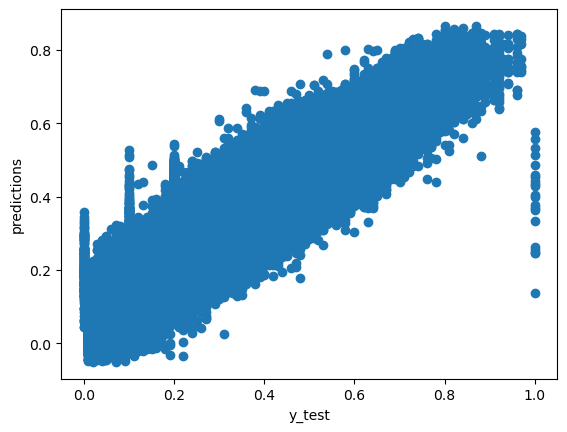

In [35]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

In [40]:
import joblib 

In [42]:
joblib.dump(LinearRegression, 'lm_model.pkl')

['lm_model.pkl']

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.058428914111598874
MSE: 0.005420461111349962
RMSE: 0.07362378088192674


In [39]:
df['accident_risk']

0         0.13
1         0.35
2         0.30
3         0.21
4         0.56
          ... 
517749    0.32
517750    0.26
517751    0.19
517752    0.51
517753    0.22
Name: accident_risk, Length: 517754, dtype: float64

In [43]:
df_test = pd.read_csv('test.csv')

In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   road_type               172585 non-null  object 
 2   num_lanes               172585 non-null  int64  
 3   curvature               172585 non-null  float64
 4   speed_limit             172585 non-null  int64  
 5   lighting                172585 non-null  object 
 6   weather                 172585 non-null  object 
 7   road_signs_present      172585 non-null  bool   
 8   public_road             172585 non-null  bool   
 9   time_of_day             172585 non-null  object 
 10  holiday                 172585 non-null  bool   
 11  school_season           172585 non-null  bool   
 12  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [49]:
df_test = pd.get_dummies(df_test)

In [50]:
df_test = df_test.astype(int, errors='ignore')

In [51]:
df_test = df_test.reindex(columns=X_train.columns, fill_value=0)

In [52]:
predictions = lm.predict(df_test)

In [53]:
predictions[:10]

array([ 0.06740976,  0.05308466,  0.01720549,  0.03534819,  0.04872723,
       -0.0344649 ,  0.18117688, -0.04856659,  0.08383549,  0.03153588])

In [54]:
predictions = np.clip(predictions, 0, 1)

In [55]:
predictions[:10]

array([0.06740976, 0.05308466, 0.01720549, 0.03534819, 0.04872723,
       0.        , 0.18117688, 0.        , 0.08383549, 0.03153588])

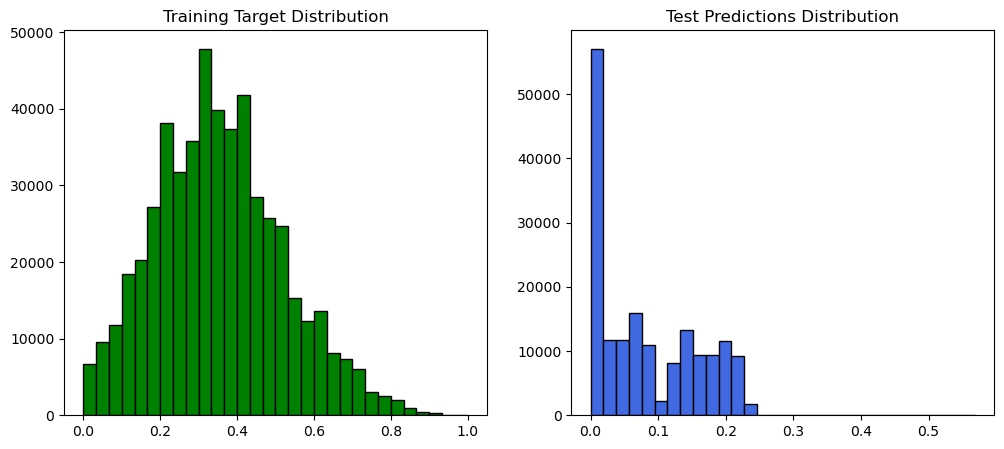

In [58]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(y, bins=30, color="green", edgecolor="k")
plt.title("Training Target Distribution")

plt.subplot(1,2,2)
plt.hist(predictions, bins=30, color="royalblue", edgecolor="k")
plt.title("Test Predictions Distribution")

plt.show(1)